# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import tensorflow as tf

%matplotlib inline

In [2]:
dataset = get_dataset("/home/workspace/data/train/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 86
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


## Write a function to display an image and the bounding boxes

Implement the `display_images` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [3]:
def display_images(batch):
    # TODO - Your implementation here
    
    #Define the figure layout 
    figure, axis = plt.subplots()
    image = batch["image"].numpy()
    axis.imshow(image)
    
    #color map definition
    color_map_def = {1: 'red', 2: 'blue', 4: 'green'}

    #Define boxes and labels present in the image
    boxes = batch['groundtruth_boxes'].numpy()
    labels = batch['groundtruth_classes'].numpy()
    
    for box, class_label in zip(boxes, labels):
        x = box[1]*image.shape[1]
        y = box[0]*image.shape[0]
        width = (box[3] - box[1])*image.shape[1]
        height = (box[2] - box[0])*image.shape[0]
        
        #define the rectangle for the object class and size
        rectangle = patches.Rectangle((x, y), width, height, linewidth = 2, facecolor = 'none', edgecolor = color_map_def[class_label])
        axis.add_patch(rectangle)

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

<Figure size 576x576 with 0 Axes>

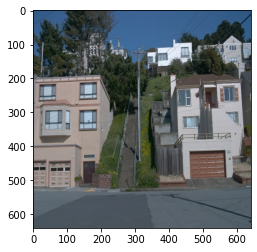

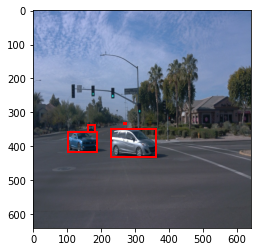

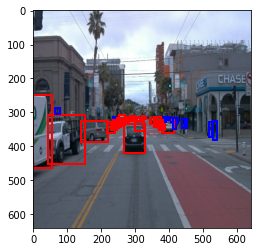

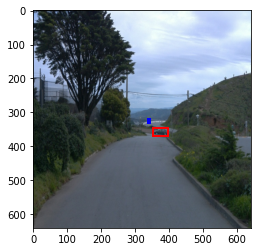

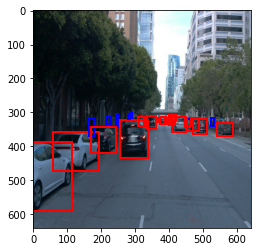

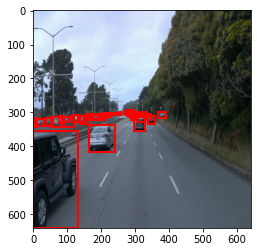

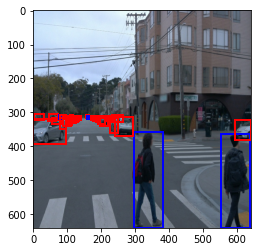

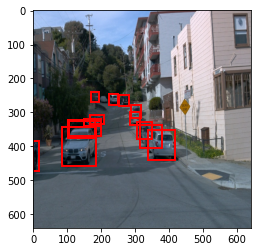

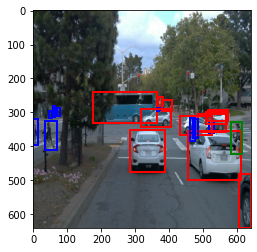

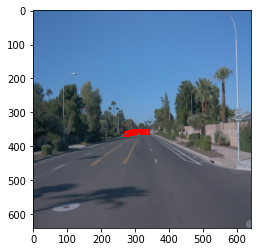

In [4]:
# Display 10 random images in dataset
plt.figure(figsize = (8, 8))
for i in range(10):
    for img in dataset.shuffle(100, reshuffle_each_iteration = True).take(1):
        display_images(img)
plt.show()

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [5]:
#Initialize variables for label count and 
labels_total = {1: 0, 2:0, 4:0}
labels_frame_count = {1:[], 2:[], 4:[]}

# For loop to go through large number of frames and calculate statistics
for batches in dataset.take(25000):
    count_per_frame = {1:0, 2:0, 4:0}
    labels_current_frame = batches["groundtruth_classes"].numpy()
    for i in labels_current_frame:
        labels_total[i] += 1
        count_per_frame[i] += 1
        labels_frame_count[i].append(count_per_frame[1])
        
#Display total cases found undedr certain labels
labels_total

{1: 431790, 2: 120922, 4: 3110}

Text(0.5, 1.0, 'Histogram of number of Vehicles in frame')

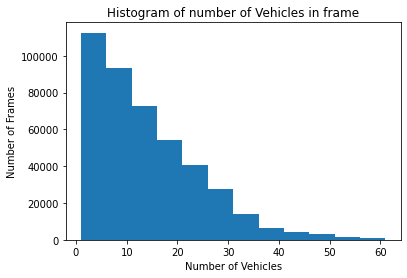

In [6]:
# Min and max number of vehicles in a single frame
min_vehicles_in_frame = min(labels_frame_count[1])
max_vehicles_in_frame = max(labels_frame_count[1])

#Histogram for number of vehicles in frame
n, bins, patches = plt.hist(labels_frame_count[1], bins = range(min_vehicles_in_frame, max_vehicles_in_frame, 5))
plt.xlabel('Number of Vehicles')
plt.ylabel('Number of Frames')
plt.title('Histogram of number of Vehicles in frame')

Text(0.5, 1.0, 'Histogram of number of Pedestrians in frame')

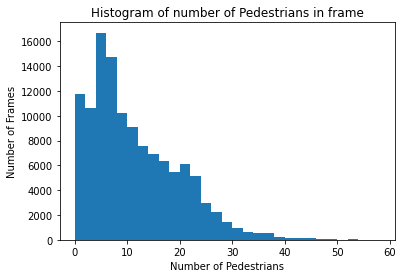

In [7]:
#Min and max number of pedestrians in frame
min_peds_in_frame = min(labels_frame_count[2])
max_peds_in_frame = max(labels_frame_count[2])

#Histogram for number of pedestrians in frame
n, bins, patches = plt.hist(labels_frame_count[2], bins = range(min_peds_in_frame, max_peds_in_frame, 2))
plt.xlabel('Number of Pedestrians')
plt.ylabel('Number of Frames')
plt.title('Histogram of number of Pedestrians in frame')

Text(0.5, 1.0, 'Histogram of number of Cyclists in frame')

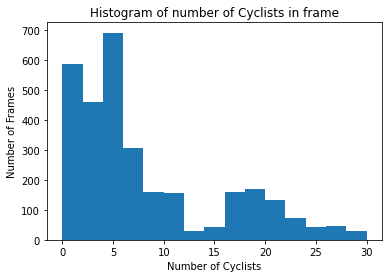

In [8]:
#Min and max number of cyclists in frame
min_cycl_in_frame = min(labels_frame_count[4])
max_cycl_in_frame = max(labels_frame_count[4])

#Histogram for number of cyclists in frame
n, bins, patches = plt.hist(labels_frame_count[4], bins = range(min_cycl_in_frame, max_cycl_in_frame, 2))
plt.xlabel('Number of Cyclists')
plt.ylabel('Number of Frames')
plt.title('Histogram of number of Cyclists in frame')

Text(0.5, 1.0, 'Class detection count of training data')

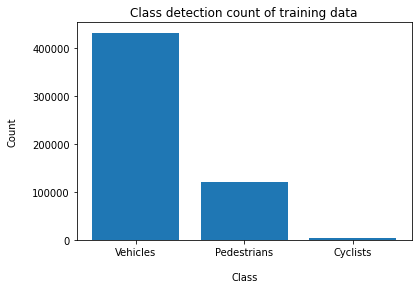

In [66]:
labels_ticks = ['Vehicles', 'Pedestrians', 'Cyclists']

plt.bar(labels_ticks, labels_total.values())
plt.xlabel('Class', labelpad = 15)
plt.ylabel('Count', labelpad = 15)
plt.title('Class detection count of training data')